In [8]:
from function import gen_QAOA_circuit,get_enrty_distribution
from fast_reconstruction import reconstruct_approximate_HMC
from qiskit.visualization import plot_histogram
from qiskit import Aer
from IPython.core.display_functions import display

In [15]:
qaoa_circuit,subcirc1,subcirc2=gen_QAOA_circuit(6)

qaoa_circuit


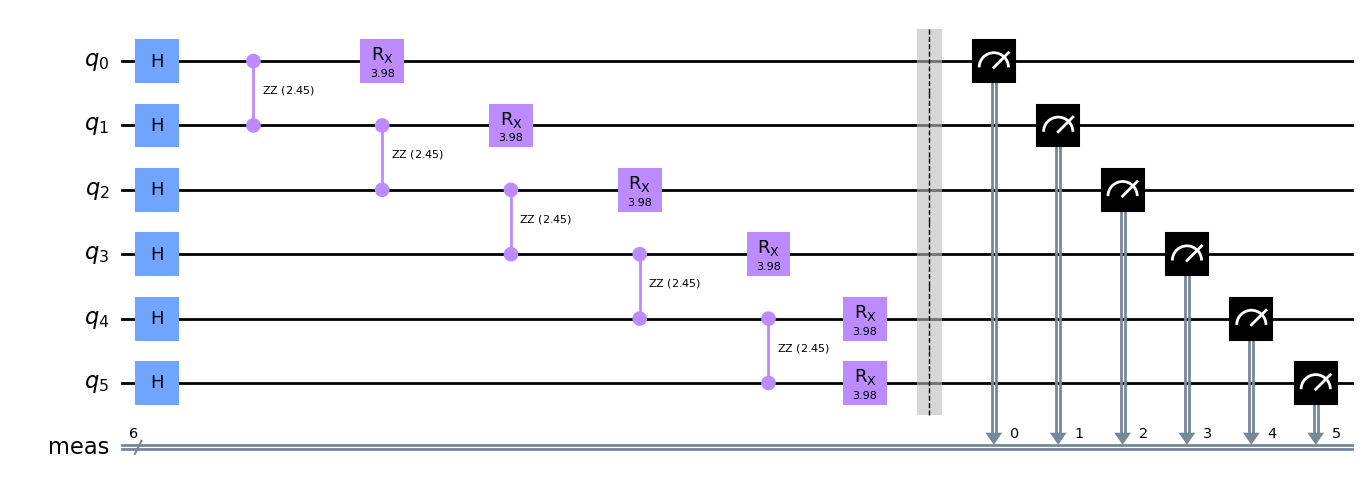

subcirc1


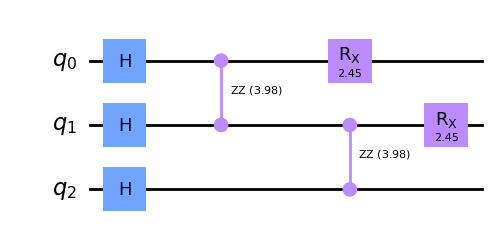

subcirc2


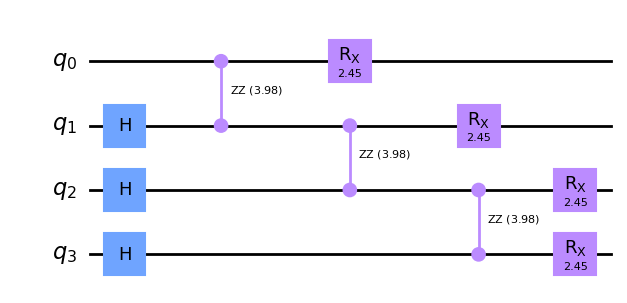

In [16]:
#subcircuits and circuit
print('qaoa_circuit')
display(qaoa_circuit.draw('mpl'))
print('subcirc1')
display(subcirc1.draw('mpl'))
print('subcirc2')
display(subcirc2.draw('mpl'))

In [17]:
#subcircuit_entry_distribution
subcircuit_entry_distributions,cuts=get_enrty_distribution(qaoa_circuit)
subcircuit_entry_distributions

Exporting as a LP file to let you check the model that will be solved :  inf <class 'float'>
Version identifier: 22.1.1.0 | 2022-11-27 | 9160aff4d
CPXPARAM_Read_DataCheck                          1
CPXPARAM_TimeLimit                               300
Tried aggregator 3 times.
MIP Presolve eliminated 35 rows and 7 columns.
MIP Presolve modified 14 coefficients.
Aggregator did 27 substitutions.
Reduced MIP has 55 rows, 29 columns, and 171 nonzeros.
Reduced MIP has 21 binaries, 8 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (0.56 ticks)
Found incumbent of value 1.000000 after 0.00 sec. (0.64 ticks)
Probing fixed 14 vars, tightened 22 bounds.
Probing changed sense of 3 constraints.
Probing time = 0.00 sec. (0.06 ticks)
Tried aggregator 1 time.
MIP Presolve eliminated 55 rows and 29 columns.
All rows and columns eliminated.
Presolve time = 0.00 sec. (0.03 ticks)

Root node processing (before b&c):
  Real time             =    0.00 sec. (0.74 ticks)
Parallel b&c, 20 threads:

{0: {0: array([0.05124634, 0.076742  , 0.15501671, 0.21699496, 0.21699496,
         0.15501671, 0.076742  , 0.05124634]),
  1: array([-0.01173584, -0.05450807, -0.12390386, -0.19476103, -0.19476103,
         -0.12390386, -0.05450807, -0.01173584]),
  2: array([-0.02764271, -0.01990096, -0.07845927, -0.08620102,  0.08620102,
          0.07845927,  0.01990096,  0.02764271]),
  3: array([ 0.04152515,  0.05022108,  0.05022108,  0.04152515, -0.04152515,
         -0.05022108, -0.05022108, -0.04152515])},
 1: {0: array([0.20723546, 0.32924713, 0.29276454, 0.17075287, 0.17075287,
         0.29276454, 0.32924713, 0.20723546]),
  1: array([ 0.13606183, -0.13606183, -0.02243243,  0.02243243,  0.02243243,
         -0.02243243, -0.13606183,  0.13606183]),
  2: array([ 0.13011904, -0.13011904,  0.15736773, -0.15736773,  0.15736773,
         -0.15736773,  0.13011904, -0.13011904]),
  3: array([-0.08661843,  0.27011088, -0.2458521 ,  0.06235966, -0.06235966,
          0.2458521 , -0.27011088,  0.08661

In [18]:
#reconstruction
FRA_result = reconstruct_approximate_HMC(subcircuit_entry_distributions,cuts)

In [19]:
#origin_result
backend=Aer.get_backend('qasm_simulator')
origin_result=backend.run(qaoa_circuit).result().get_counts()

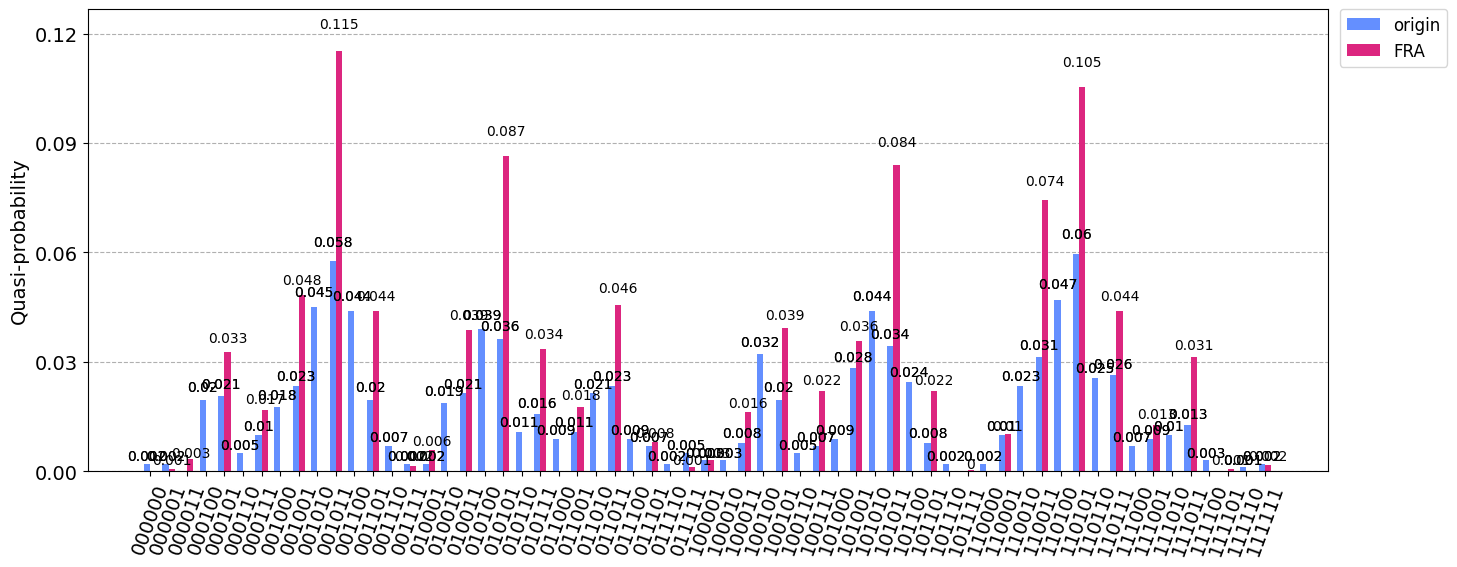

In [20]:
legend=['origin','FRA']
plot_histogram([origin_result,FRA_result],
    figsize=(16, 6),
    sort="asc",legend=legend)